In [52]:
import numpy as np
import random
import matplotlib.pyplot as plt
import networkx as nx

from pyqubo import Binary, Array
from pprint import pprint
from qat.lang.AQASM import Program, QRoutine, RZ, RX, CNOT, H, X
from qat.core import Observable, Term
from qat.qpus import get_default_qpu
from qat.plugins import ScipyMinimizePlugin

# Problema da Cobertura Exata (Exact Cover Problem)


In [53]:
#U = [1,2,3,4,5,6]
#V = [{1,2,3}, {4,5,6}, {1}, {2}, {3}, {4}, {5}, {6}]
U = [1,2,3,4,5,6,7]
V = [{1,7}, {1,4,7}, {1,4}, {4,5,7}, {3,5,6}, {2,3,6}, {2,7}]
A = 8
B = 1.5

## Hamiltoniano

In [54]:
variables = Array.create('x', shape=len(V), vartype='BINARY')
print(variables)

Array([Binary('x[0]'), Binary('x[1]'), Binary('x[2]'), Binary('x[3]'), Binary('x[4]'), Binary('x[5]'), Binary('x[6]')])


In [55]:
HA = 0
for alpha in U:
    temp = sum(variables[i] for i, Vi in enumerate(V) if alpha in Vi)
    HA += (1-temp)**2
HA *= A

print(HA)

((((1.000000 + (-1.000000 * ((Binary('x[0]') + Binary('x[1]')) + Binary('x[2]')))) * (1.000000 + (-1.000000 * ((Binary('x[0]') + Binary('x[1]')) + Binary('x[2]'))))) + ((1.000000 + (-1.000000 * (Binary('x[5]') + Binary('x[6]')))) * (1.000000 + (-1.000000 * (Binary('x[5]') + Binary('x[6]'))))) + ((1.000000 + (-1.000000 * (Binary('x[4]') + Binary('x[5]')))) * (1.000000 + (-1.000000 * (Binary('x[4]') + Binary('x[5]'))))) + ((1.000000 + (-1.000000 * ((Binary('x[1]') + Binary('x[2]')) + Binary('x[3]')))) * (1.000000 + (-1.000000 * ((Binary('x[1]') + Binary('x[2]')) + Binary('x[3]'))))) + ((1.000000 + (-1.000000 * (Binary('x[3]') + Binary('x[4]')))) * (1.000000 + (-1.000000 * (Binary('x[3]') + Binary('x[4]'))))) + ((1.000000 + (-1.000000 * (Binary('x[4]') + Binary('x[5]')))) * (1.000000 + (-1.000000 * (Binary('x[4]') + Binary('x[5]'))))) + ((1.000000 + (-1.000000 * (((Binary('x[0]') + Binary('x[1]')) + Binary('x[3]')) + Binary('x[6]')))) * (1.000000 + (-1.000000 * (((Binary('x[0]') + Binary(

In [56]:
HB = B * sum(x for x in variables)

print(HB)

(1.500000 * ((((((Binary('x[0]') + Binary('x[1]')) + Binary('x[2]')) + Binary('x[3]')) + Binary('x[4]')) + Binary('x[5]')) + Binary('x[6]')))


In [57]:
Hamil = HA + HB
print(Hamil)

(((((1.000000 + (-1.000000 * ((Binary('x[0]') + Binary('x[1]')) + Binary('x[2]')))) * (1.000000 + (-1.000000 * ((Binary('x[0]') + Binary('x[1]')) + Binary('x[2]'))))) + ((1.000000 + (-1.000000 * (Binary('x[5]') + Binary('x[6]')))) * (1.000000 + (-1.000000 * (Binary('x[5]') + Binary('x[6]'))))) + ((1.000000 + (-1.000000 * (Binary('x[4]') + Binary('x[5]')))) * (1.000000 + (-1.000000 * (Binary('x[4]') + Binary('x[5]'))))) + ((1.000000 + (-1.000000 * ((Binary('x[1]') + Binary('x[2]')) + Binary('x[3]')))) * (1.000000 + (-1.000000 * ((Binary('x[1]') + Binary('x[2]')) + Binary('x[3]'))))) + ((1.000000 + (-1.000000 * (Binary('x[3]') + Binary('x[4]')))) * (1.000000 + (-1.000000 * (Binary('x[3]') + Binary('x[4]'))))) + ((1.000000 + (-1.000000 * (Binary('x[4]') + Binary('x[5]')))) * (1.000000 + (-1.000000 * (Binary('x[4]') + Binary('x[5]'))))) + ((1.000000 + (-1.000000 * (((Binary('x[0]') + Binary('x[1]')) + Binary('x[3]')) + Binary('x[6]')))) * (1.000000 + (-1.000000 * (((Binary('x[0]') + Binary

## Modelar como QUBO

In [58]:
model = Hamil.compile()
qubo = model.to_qubo()
pprint(qubo)

({('x[0]', 'x[0]'): -14.5,
  ('x[0]', 'x[1]'): 32.0,
  ('x[0]', 'x[2]'): 16.0,
  ('x[0]', 'x[3]'): 16.0,
  ('x[0]', 'x[6]'): 16.0,
  ('x[1]', 'x[1]'): -22.5,
  ('x[1]', 'x[2]'): 32.0,
  ('x[1]', 'x[3]'): 32.0,
  ('x[1]', 'x[6]'): 16.0,
  ('x[2]', 'x[2]'): -14.5,
  ('x[2]', 'x[3]'): 16.0,
  ('x[3]', 'x[3]'): -22.5,
  ('x[3]', 'x[4]'): 16.0,
  ('x[3]', 'x[6]'): 16.0,
  ('x[4]', 'x[4]'): -22.5,
  ('x[4]', 'x[5]'): 32.0,
  ('x[5]', 'x[5]'): -22.5,
  ('x[5]', 'x[6]'): 16.0,
  ('x[6]', 'x[6]'): -14.5},
 56.0)


In [59]:
single_values = {}
for k,v in qubo[0].items():
    if k[0] == k[1]:
        single_values[int(k[0][2])] = v

multiple_values = {}
for k,v in qubo[0].items():
    if k[0] != k[1]:
        multiple_values[(int(k[0][2]), int(k[1][2]))] = v

num_qubits = len(variables)
hamiltonian_exact_cover = Observable(num_qubits,
                           pauli_terms=
                           [Term(single_values[x], "Z", [x]) for x in single_values]+
                           [Term(multiple_values[x], "ZZ", [x[0],x[1]]) for x in multiple_values],
                           constant_coeff=qubo[1]
                           )

print(hamiltonian_exact_cover)

56.0 * I^7 +
-22.5 * (Z|[4]) +
-14.5 * (Z|[2]) +
-14.5 * (Z|[6]) +
-14.5 * (Z|[0]) +
-22.5 * (Z|[5]) +
-22.5 * (Z|[3]) +
-22.5 * (Z|[1]) +
32.0 * (ZZ|[0, 1]) +
16.0 * (ZZ|[0, 2]) +
32.0 * (ZZ|[4, 5]) +
16.0 * (ZZ|[0, 3]) +
32.0 * (ZZ|[1, 3]) +
16.0 * (ZZ|[0, 6]) +
16.0 * (ZZ|[3, 6]) +
16.0 * (ZZ|[1, 6]) +
32.0 * (ZZ|[1, 2]) +
16.0 * (ZZ|[2, 3]) +
16.0 * (ZZ|[5, 6]) +
16.0 * (ZZ|[3, 4])


## QAOA Ansatz

### Separador de Fase

In [60]:
def phase_separator_exact_cover(qreg, gamma, single_values, multiple_values, num_qubits):
    for i in single_values:
        RZ(gamma)(qreg[i])
    for j in multiple_values:
        CNOT(qreg[j[0]], qreg[j[1]])
        RZ(2*gamma)(qreg[j[1]])
        CNOT(qreg[j[0]], qreg[j[1]])

### Misturador (Mixer)

In [61]:
def mixer_exact_cover(qreg, beta, num_qubits):
        for q in range(num_qubits):
            RX(beta)(qreg[q])

In [62]:
# --------------------------
# Running QAOA for Max Independent Set on simulator
# --------------------------

# -------------------
# Initializing qubits
# -------------------
p = 4
qprog = Program()

gamma  = [qprog.new_var(float, '\\gamma_%s'%i) for i in range(1,p+1)]
beta   = [qprog.new_var(float, '\\beta_%s'%i) for i in range(1,p+1)]

# --------------------------
# Initial state preparation
# --------------------------
qbits = qprog.qalloc(num_qubits)
for q in range(num_qubits):
    H(qbits[q])

# ----------------------------------
# Alternate application of operators
# ----------------------------------
for step in range(p):
    phase_separator_exact_cover(qbits, gamma[step], single_values, multiple_values, num_qubits)
    mixer_exact_cover(qbits, beta[step], num_qubits)

### Visualização do Circuito

In [63]:
circuit = qprog.to_circ()
print("total number of gates: ", len(circuit.ops))
print("Variables:", circuit.get_variables())
# Display quantum circuit
%qatdisplay circuit --svg

total number of gates:  207
Variables: ['\\beta_1', '\\beta_2', '\\beta_3', '\\beta_4', '\\gamma_1', '\\gamma_2', '\\gamma_3', '\\gamma_4']


## Rodar o Circuito usando QLM

In [64]:
# Create a job
job = circuit.to_job(observable=hamiltonian_exact_cover)

result_list = []
for _ in range(10):
    ## A cobyla minimizer over any number of variables, random initialization, 200 max steps
    cobyla = ScipyMinimizePlugin(tol=1e-6,
                                method="COBYLA",
                                options={"maxiter": 300},
                                x0=[random.uniform(0, 2*np.pi) for _ in range(2*p)])
    # Create a Quantum Processor Unit
    qpu = get_default_qpu()

    stack = cobyla | qpu

    # Submit the job to the QPU
    result_list.append(stack.submit(job))

## Análise dos Resultados

In [65]:
for i, r in enumerate(result_list):
    print("Run", i, ", Final energy:", r.value)
    #Binding the variables:random.uniform(0, 2*np.pi)
    sol_job = job(**eval(r.meta_data["parameter_map"]))

    #Rerunning in 'SAMPLE' mode to get the most probable states:
    sampling_job = sol_job.circuit.to_job()

    sol_res = qpu.submit(sampling_job)
    print("Most probable states are:")
    for sample in sol_res:
        if sample.probability > 0.05:
            print(sample.state, "{:.2f}%".format(100 * sample.probability))

Run 0 , Final energy: 13.41601415239063
Most probable states are:
|0011000> 6.66%
Run 1 , Final energy: -28.579254008302797
Most probable states are:
|0010101> 5.65%
|0011001> 14.04%
|0011010> 13.37%
|0011011> 6.08%
Run 2 , Final energy: -27.302978887712506
Most probable states are:
|0010101> 6.13%
|0011001> 5.31%
|0011010> 6.82%
|0101010> 5.88%
|1001010> 5.88%
Run 3 , Final energy: 23.347073988682872
Most probable states are:
|0001001> 5.34%
|0010001> 12.28%
Run 4 , Final energy: -14.909870161295316
Most probable states are:
|1100010> 5.22%
|1100100> 9.56%
Run 5 , Final energy: -30.270300772669927
Most probable states are:
|0010101> 5.36%
|0101010> 7.74%
|1001010> 7.74%
Run 6 , Final energy: -26.13128915093868
Most probable states are:
|0010101> 6.29%
|0011001> 6.37%
|0011010> 6.85%
Run 7 , Final energy: -37.05083682113016
Most probable states are:
|0011000> 5.96%
|0011001> 31.64%
|0011010> 31.19%
Run 8 , Final energy: -31.333011677961558
Most probable states are:
|0010101> 7.63%
|001

In [66]:
result = min(result_list, key=lambda s: s.value)
print("Final energy:", result.value)
for key, value in result.meta_data.items():
    print(key, ":", value)

Final energy: -37.05083682113016
optimizer_data :      fun: -37.05083682113016
   maxcv: 0.0
 message: 'Maximum number of function evaluations has been exceeded.'
    nfev: 300
  status: 2
 success: False
       x: array([0.76942703, 5.82369534, 2.72402585, 5.98000214, 4.69519381,
       1.92280358, 2.17419883, 1.30696322])
parameters : [0.7694270308211448, 5.823695342815821, 2.72402585336344, 5.980002137067496, 4.695193813367008, 1.9228035766487044, 2.1741988303209823, 1.3069632199071077]
optimization_trace : [70.1950545287466, 86.04225590834447, 104.51155562254827, 55.95923021218513, -12.126814893973918, 48.6520825280131, 7.304159284724465, -8.6809160498205, -23.752919023989836, 132.94649703604108, -16.51876472403155, -15.635971642860408, -10.903475516103846, -9.70285608300531, 52.815952487876906, -25.576350373603724, -3.2509791267607113, -18.331067391441543, 23.28387437460131, 15.174959966577877, -26.33357242104944, -15.076617269982824, -21.651841431307773, -30.009418849025053, -5.3

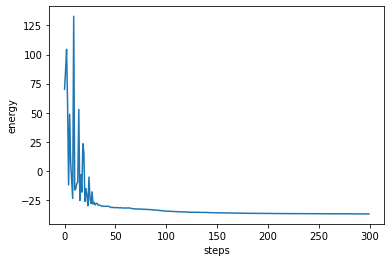

In [67]:
plt.plot(eval(result.meta_data["optimization_trace"]))
plt.xlabel("steps")
plt.ylabel("energy")
plt.show()

In [68]:
import itertools
def exact_cover_obj(result, U, V):
    solution = [Vi for i, Vi in enumerate(V) if result[i] == '1']
    for i in itertools.combinations(solution, 2):
        if len(i[0].intersection(i[1])) != 0:
            return np.inf
    cover = set().union(*solution)
    difference = set(U) - cover
    if len(difference) == 0:
        return len(solution)
    else:
        return np.inf

In [69]:
# Emulating a reasonnable setup:
# Drawing 1024 cuts
sol_job = job(**eval(result.meta_data["parameter_map"]))
sampling_job = sol_job.circuit.to_job(nbshots=1024)
sol_res = qpu.submit(sampling_job)

tuple_list = [(s.state.value[0], exact_cover_obj(s.state.value[0],U,V)) for s in sol_res]

exact_cover = min(tuple_list, key=lambda s: s[1])[0]
print(
    "Exact Cover:",
    [Vi for i, Vi in enumerate(V) if exact_cover[i] == '1']
)

Exact Cover: [{1, 4}, {3, 5, 6}, {2, 7}]
